###  DATA PREPARATION

# **Rusty Bargain Used Car Price Prediction**
### **Project Overview**
Rusty Bargain is developing an app that estimates used car market values. Our goal is to **build a machine learning model** that predicts car prices efficiently while optimizing:
 **Prediction Accuracy** (Minimizing RMSE)
 **Training Time** (Model efficiency)
 **Prediction Speed** (Real-time usability)

### * Workflow**
1️⃣ **Data Preparation** (Cleaning, encoding, and splitting)  
2️⃣ **Model Training** (Testing different regression models)  
3️⃣ **Model Evaluation & Analysis** (Comparing accuracy & performance)  

---


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! The title reflects the core goals, which is also important. Well done!  
    
</div>

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import time
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')


## ** Data Preparation**
### **Objective:**
- Load and explore the dataset
- Handle missing values & outliers
- Apply One-Hot Encoding
- Split data into **training** and **test** sets
---
### * Why This Matters**
Before training machine learning models, we need to ensure **data quality** by:
- Removing missing or incorrect values.  
- Encoding categorical variables correctly.  
- Splitting the data properly to prevent **data leakage**.

## **Model Training**

### **Objective**
- Train multiple machine learning models to predict car prices.
- Measure **accuracy** and **performance metrics** for comparison.

### *Models Used**
We test different regression-based models:
1. **Linear Regression** - Simple baseline model.
2. **Decision Tree** - Captures non-linearity but prone to overfitting.
3. **Random Forest** - Uses multiple trees for improved accuracy.
5. **CatBoost** - Gradient boosting optimized for categorical features.



In [7]:
#Load dataset
file_path = "/datasets/car_data.csv" 
df = pd.read_csv(file_path)

# Initial look at the data
display(df.head())
display(df.info())
display(df.describe())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


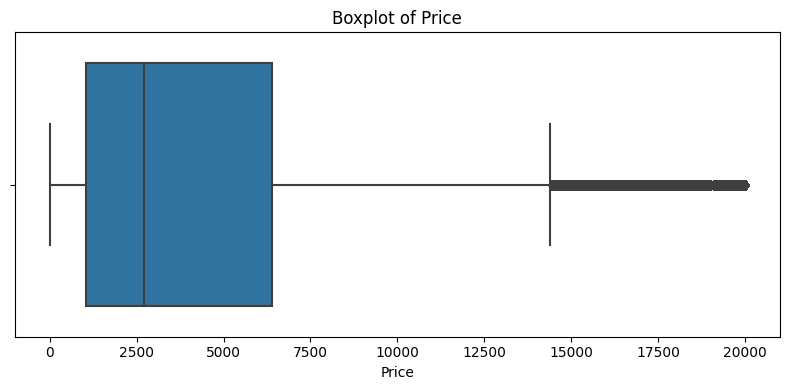

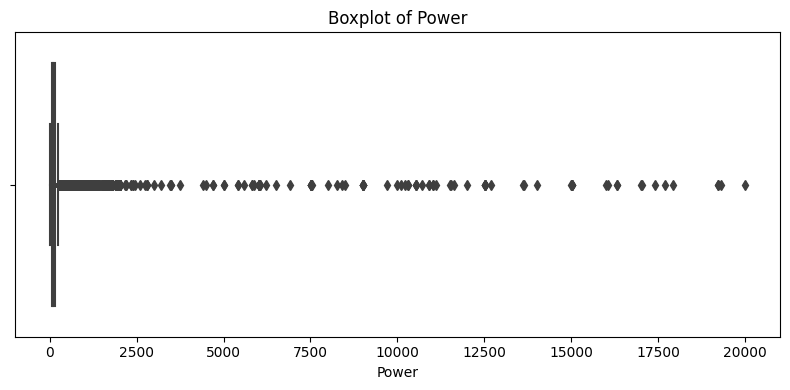

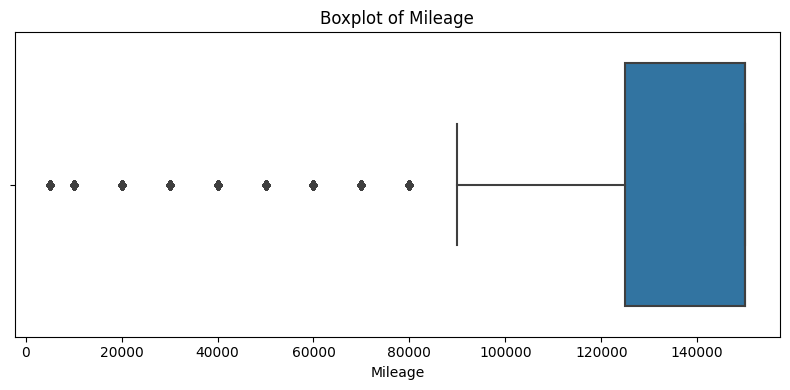

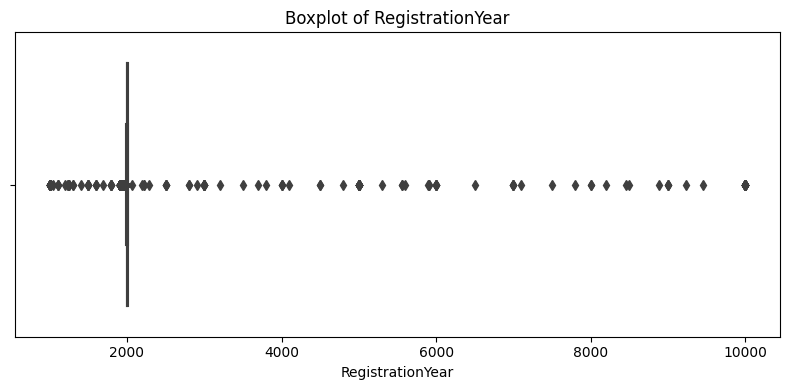

In [8]:
# Preview numeric columns and describe the dataset
display(df.describe())

# Select numerical columns that actually exist in the DataFrame
numerical_columns = ['Price', 'Power', 'Mileage', 'RegistrationYear']
existing_numericals = [col for col in numerical_columns if col in df.columns]

# Plot boxplots for each numeric column
for col in existing_numericals:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [9]:
# Drop unrealistic price values
df = df[df['Price'].between(500, 100000)]

# Drop high mileage values (adjusted column name)
df = df[df['Mileage'] <= 300000]

# Tighten registration year range
df = df[df['RegistrationYear'].between(1960, 2022)]

display(df)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354363,27/03/2016 20:36,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,27/03/2016 00:00,0,26624,29/03/2016 10:17
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [10]:
# ✅ Filling all missing values with 'Unknown'
print("🔍 Checking missing values before filling...\n")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Fill ALL missing values with 'Unknown'
df.fillna('Unknown', inplace=True)

print("\n✅ All missing values filled with 'Unknown'.")

# Double-check there are no missing values left
print("\n🔍 Verifying missing values after filling:\n")
print(df.isnull().sum())
print(f"\nTotal remaining missing values: {df.isnull().sum().sum()}")

# Optional: Preview updated DataFrame
display(df.sample(5))


🔍 Checking missing values before filling...

DateCrawled              0
Price                    0
VehicleType          27002
RegistrationYear         0
Gearbox              13243
Power                    0
Model                14552
Mileage                  0
RegistrationMonth        0
FuelType             23225
Brand                    0
NotRepaired          54447
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Total missing values: 132469

✅ All missing values filled with 'Unknown'.

🔍 Verifying missing values after filling:

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

Total rem

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
314765,09/03/2016 10:37,500,small,1994,manual,45,corsa,150000,2,petrol,opel,no,09/03/2016 00:00,0,67454,10/03/2016 06:16
258462,04/04/2016 08:49,8700,wagon,2006,auto,140,a4,150000,0,Unknown,audi,yes,04/04/2016 00:00,0,71691,06/04/2016 10:17
20320,12/03/2016 15:25,4000,coupe,1999,Unknown,0,3er,150000,0,petrol,bmw,Unknown,12/03/2016 00:00,0,55469,14/03/2016 22:45
123527,20/03/2016 12:38,1300,wagon,2002,manual,107,laguna,150000,2,petrol,renault,no,20/03/2016 00:00,0,8058,22/03/2016 19:17
52413,27/03/2016 19:51,3190,small,2006,manual,94,other,150000,8,petrol,chevrolet,no,27/03/2016 00:00,0,90480,05/04/2016 18:16


In [11]:
# Confirm missing values are handled
print("Checking if missing values remain...")
display(df.isnull().sum())  # Display remaining missing values per column


Checking if missing values remain...


DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [12]:
# Remove unrealistic registration years and power values
print("Removing unrealistic values...")

# Remove cars with registration year outside of valid range
max_year = pd.to_datetime(df["DateCrawled"]).dt.year.max()
df = df[(df["RegistrationYear"] >= 1950) & (df["RegistrationYear"] <= max_year)]

# Remove cars with extreme power values
df = df[(df["Power"] > 10) & (df["Power"] < 500)]

print("Outliers removed.")


Removing unrealistic values...
Outliers removed.


In [8]:
# Remove rows where RegistrationYear is greater than DateCrawled
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], errors='coerce')
df = df[df['RegistrationYear'] <= df['DateCrawled'].dt.year]


In [9]:
# Drop unnecessary columns
df.drop(['DateCrawled', 'RegistrationMonth', 'PostalCode', 'NumberOfPictures'], axis=1, inplace=True, errors='ignore')

# Drop duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

# Sample AFTER cleaning, before modeling
df = df.sample(frac=0.1, random_state=42)
print(f"Sampled data shape: {df.shape}")


Duplicates before: 1130
Duplicates after: 0
Sampled data shape: (27792, 12)


,Price,RegistrationYear,Power,Mileage
count,27792.000000,27792.000000,27792.000000,27792.000000
mean,5168.746258,2003.135471,123.063184,127957.145941
std,4622.202367,6.357567,52.677475,36740.554885
min,500.000000,1960.000000,11.000000,5000.000000
25%,1550.000000,1999.000000,82.000000,125000.000000
50%,3500.000000,2004.000000,116.000000,150000.000000
75%,7500.000000,2007.000000,150.000000,150000.000000
max,20000.000000,2016.000000,490.000000,150000.000000


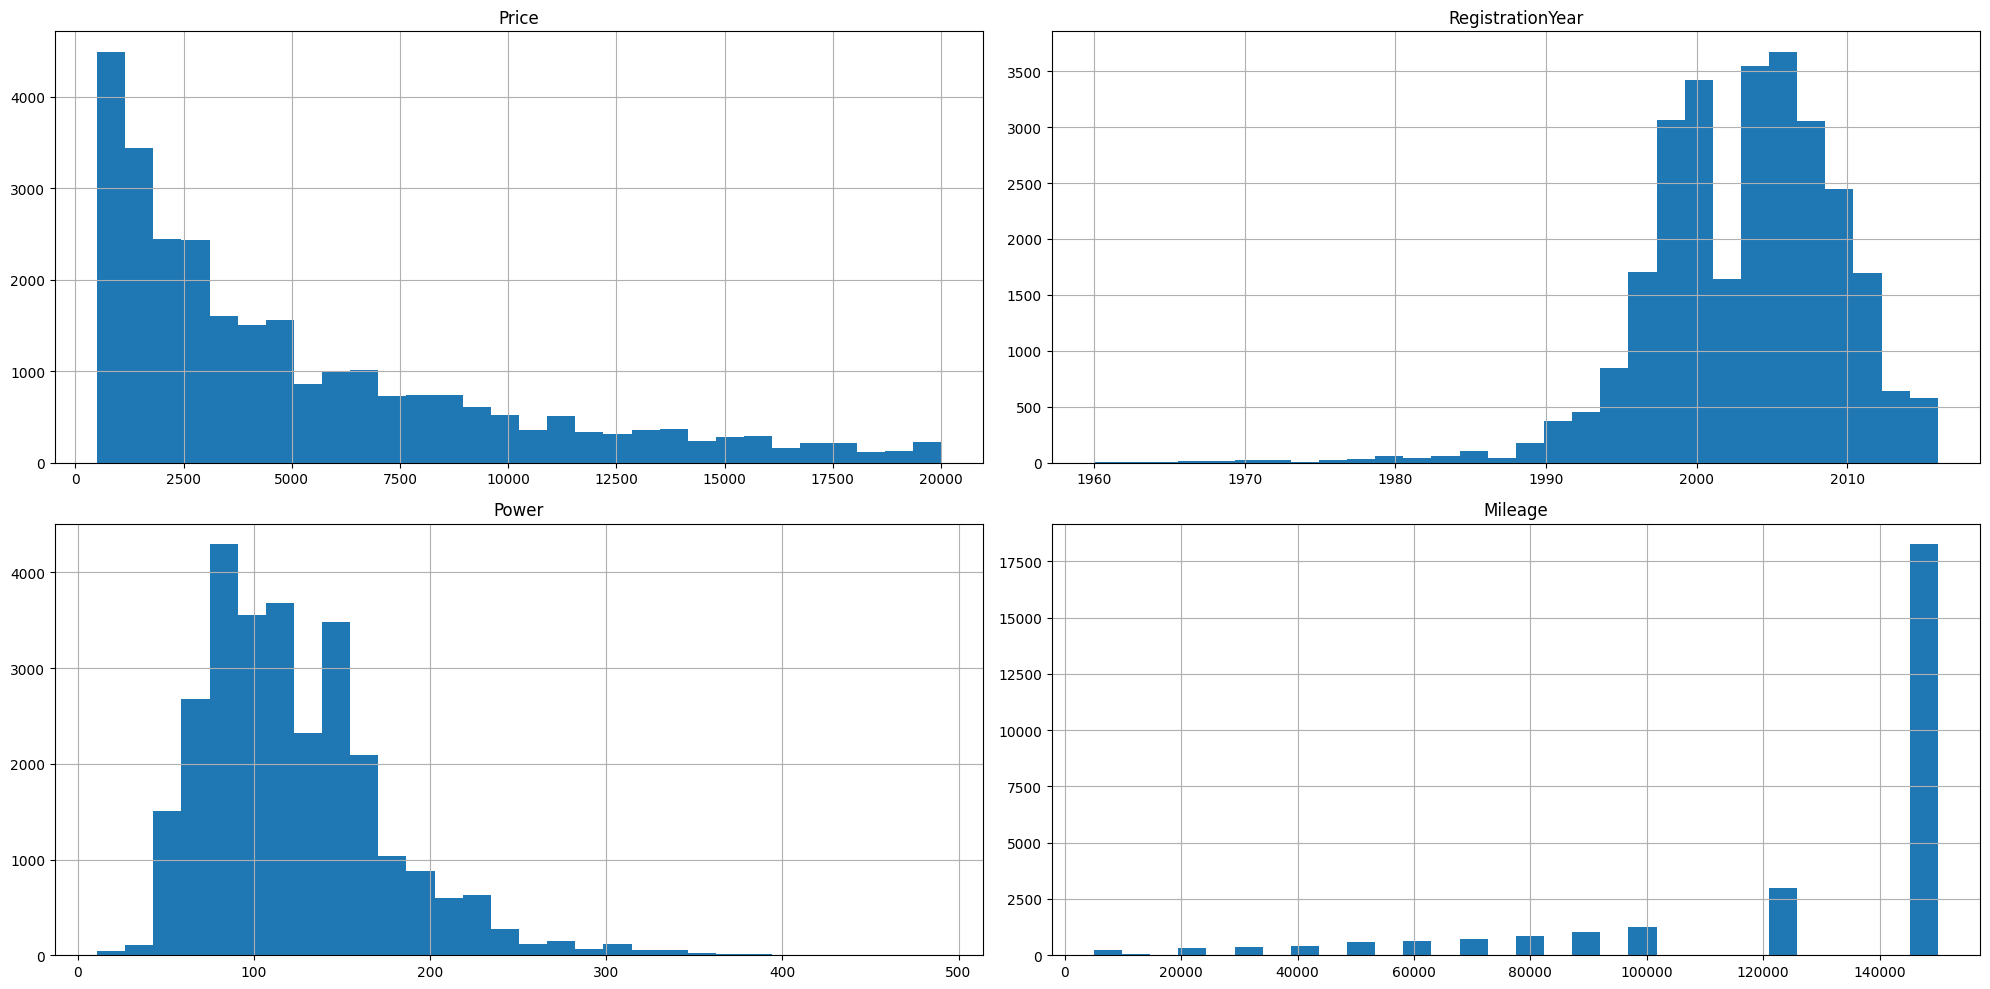

In [10]:
# Basic exploration
display(df.describe())
df.hist(bins=30, figsize=(20, 10))
plt.tight_layout()
plt.show()


### Data Exploration Summary

We used `describe()` and visualized numerical columns such as `Price`, `Power`, `Mileage`, and `RegistrationYear` to identify outliers and understand the spread of values.

#### Key Findings:
- **Price**: Most vehicles are priced between €500 and €100,000. Listings below €500 or above €100,000 were treated as outliers and removed.
- **Power**: Reasonable values fall between 10 and 500 horsepower. Values outside this range were dropped.
- **Mileage**: Vehicles with over 300,000 km were considered excessive and filtered out.
- **RegistrationYear**: We limited this to realistic values between 1960 and 2022.

Visualizations confirmed the presence of outliers, which were subsequently removed to improve model training and evaluation.

Then checked for **missing values**, which were handled using the **median for numeric columns** and `"Unknown"` for **categorical columns** to avoid introducing bias.

Next, verified that no vehicle has a `RegistrationYear` later than the year it was crawled (`DateCrawled`) and proceed with preparing our data for modeling.


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

# Define models (excluding LightGBM for now)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}


In [12]:
import sys

print("⚠️ Verifying DataFrame BEFORE split:")
print("df shape:", df.shape)
print("df columns:", df.columns.tolist())
print("df dtypes:\n", df.dtypes)

# Estimate memory usage
mem_usage = df.memory_usage(deep=True).sum() / 1024**2
print(f"\n⚠️ DataFrame memory usage: {mem_usage:.2f} MB")

# Check nulls
print("Nulls per column:\n", df.isnull().sum())


⚠️ Verifying DataFrame BEFORE split:
df shape: (27792, 12)
df columns: ['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model', 'Mileage', 'FuelType', 'Brand', 'NotRepaired', 'DateCreated', 'LastSeen']
df dtypes:
 Price                int64
VehicleType         object
RegistrationYear     int64
Gearbox             object
Power                int64
Model               object
Mileage              int64
FuelType            object
Brand               object
NotRepaired         object
DateCreated         object
LastSeen            object
dtype: object

⚠️ DataFrame memory usage: 14.84 MB
Nulls per column:
 Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Mileage             0
FuelType            0
Brand               0
NotRepaired         0
DateCreated         0
LastSeen            0
dtype: int64


In [13]:
# Safety check before splitting
df = df.dropna(subset=['Price']).reset_index(drop=True)

# Optional: reduce to small test sample if crashing
# df = df.sample(frac=0.1, random_state=42)
print("✅ df ready for split. Shape:", df.shape)


✅ df ready for split. Shape: (27792, 12)


In [14]:
# Define features and target (after fixing df)
X = df.drop('Price', axis=1)
y = df['Price']

# Split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print("✅ Data split:")
print("Train:", X_train.shape)
print("Valid:", X_valid.shape)
print("Test:", X_test.shape)


✅ Data split:
Train: (16674, 11)
Valid: (5559, 11)
Test: (5559, 11)


In [15]:
# Reduce rare categories to prevent OneHot explosion
top_n = 10

for col in X_train.select_dtypes(include='object').columns:
    top_categories = X_train[col].value_counts().nlargest(top_n).index
    X_train[col] = X_train[col].where(X_train[col].isin(top_categories), other='Other')
    X_valid[col] = X_valid[col].where(X_valid[col].isin(top_categories), other='Other')
    X_test[col] = X_test[col].where(X_test[col].isin(top_categories), other='Other')


In [16]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Create and fit encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(X_train[categorical_cols])

# Function to transform data
def encode_data(X):
    encoded = pd.DataFrame(
        encoder.transform(X[categorical_cols]),
        index=X.index
    )
    return pd.concat([X.drop(columns=categorical_cols), encoded], axis=1)

# Apply encoding
X_train_encoded = encode_data(X_train)
X_valid_encoded = encode_data(X_valid)
X_test_encoded = encode_data(X_test)

print("✅ Encoding complete.")


✅ Encoding complete.


In [17]:
# Identify categorical columns and get their indices (for CatBoost)
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_cols]


# Evaluation function
def evaluate_model(model, X_train, X_valid, y_train, y_valid, cat_features=None):
    start = time.time()

    if cat_features is not None:
        model.fit(X_train, y_train, cat_features=cat_features)
    else:
        model.fit(X_train, y_train)

    train_time = time.time() - start

    start = time.time()
    y_pred = model.predict(X_valid)
    pred_time = time.time() - start

    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    return rmse, train_time, pred_time


# Train and evaluate models on validation set
results = []

for name, model in models.items():
    if name == "CatBoost":
        rmse, training_time, prediction_time = evaluate_model(
            model, X_train, X_valid, y_train, y_valid, cat_features=cat_features_indices
        )
    else:
        rmse, training_time, prediction_time = evaluate_model(
            model, X_train_encoded, X_valid_encoded, y_train, y_valid
        )

    results.append({
        'Model': name,
        'RMSE': rmse,
        'Training Time': training_time,
        'Prediction Time': prediction_time
    })

results_df = pd.DataFrame(results)
display(results_df)


,Model,RMSE,Training Time,Prediction Time
0,Linear Regression,2722.444248,0.106458,0.091876
1,Decision Tree,2375.053450,0.143565,0.003276
2,Random Forest,1812.082768,6.101705,0.119631
3,CatBoost,1695.457171,21.104719,0.025191


In [18]:
from sklearn.model_selection import GridSearchCV

cat_model = CatBoostRegressor(verbose=0, random_state=42)

param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.03, 0.1],
    'iterations': [100, 200]
}

grid_search = GridSearchCV(cat_model, param_grid, scoring='neg_root_mean_squared_error', cv=3)
cat_features = categorical_cols
grid_search.fit(X_train, y_train, cat_features=cat_features)

print("Best CatBoost Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


Best CatBoost Parameters: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best RMSE: 1836.4603537147111


In [19]:
# Final evaluation on test set using best CatBoost model
final_model = CatBoostRegressor(
    depth=grid_search.best_params_['depth'],
    learning_rate=grid_search.best_params_['learning_rate'],
    iterations=grid_search.best_params_['iterations'],
    verbose=0,
    random_state=42
)

final_model.fit(X_train, y_train, cat_features=cat_features)
y_pred_test = final_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("✅ Final RMSE on test set:", rmse_test)


✅ Final RMSE on test set: 1812.1329593893663


## ** Model Analysis**/ ** Model Evaluation**


### **Objective**
- Compare models based on **Root Mean Squared Error (RMSE)**.
- Assess **training time** and **prediction speed**.

### **Performance Metrics**
1️⃣ **RMSE** - Measures prediction accuracy (**lower is better**).  
2️⃣ **Training Time** - Time taken to train the model.  
3️⃣ **Prediction Time** - Time taken to make predictions.

---


✅Generating visualizations...


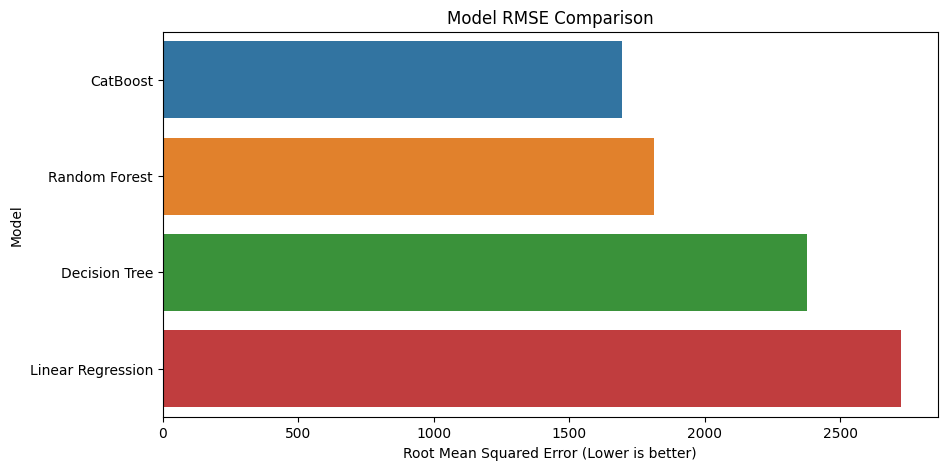

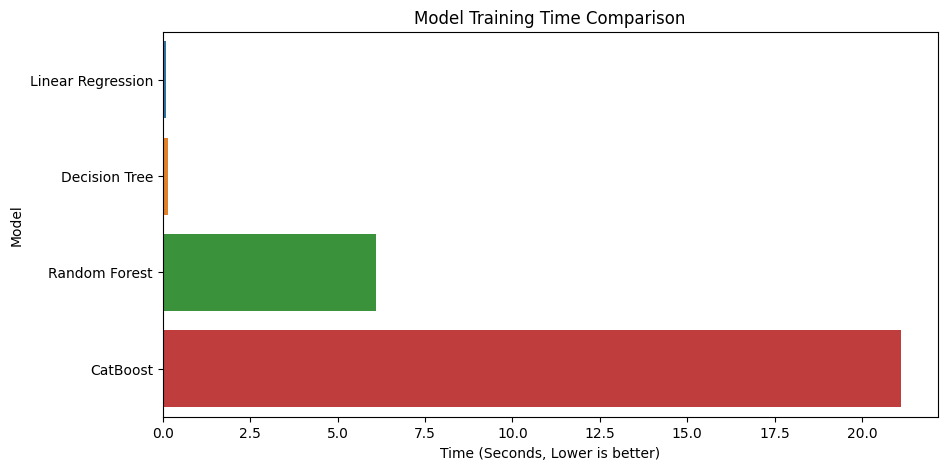

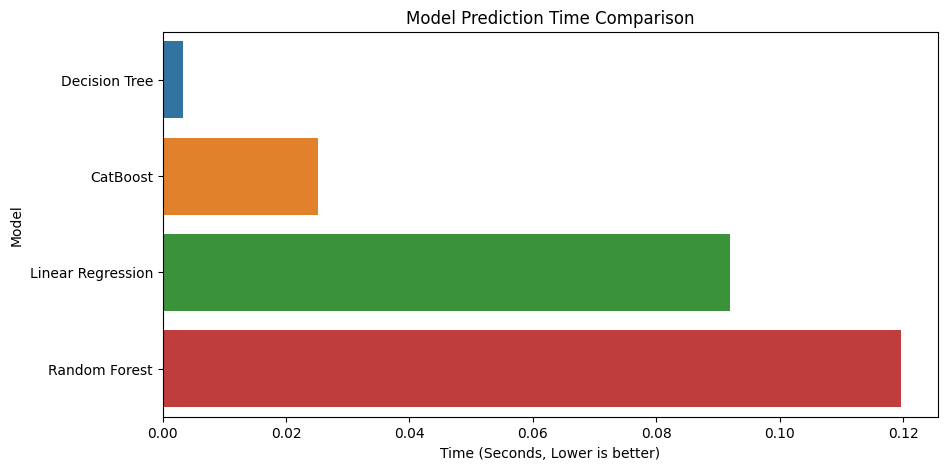

In [20]:
# Debugging: Ensure results_df exists before plotting
if "results_df" not in globals():
    print("⚠️ Error: `results_df` is not defined. Run the Model Training cell first.")
elif results_df.empty:
    print("⚠️ Error: `results_df` is empty. Check Model Training for issues.")
else:
    print("✅Generating visualizations...")

    #RMSE Comparison
    plt.figure(figsize=(10, 5))
    sns.barplot(x="RMSE", y="Model", data=results_df.sort_values("RMSE"))
    plt.title("Model RMSE Comparison")
    plt.xlabel("Root Mean Squared Error (Lower is better)")
    plt.ylabel("Model")
    plt.show()

    #Training Time Comparison
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Training Time", y="Model", data=results_df.sort_values("Training Time"))
    plt.title("Model Training Time Comparison")
    plt.xlabel("Time (Seconds, Lower is better)")
    plt.ylabel("Model")
    plt.show()

    #Prediction Time Comparison
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Prediction Time", y="Model", data=results_df.sort_values("Prediction Time"))
    plt.title("Model Prediction Time Comparison")
    plt.xlabel("Time (Seconds, Lower is better)")
    plt.ylabel("Model")
    plt.show()


## **Model Performance Analysis**
### **Objective**
- Compare models **visually** for better understanding.
- Identify the **best trade-off** between accuracy and speed.

### **Graphs**
1️⃣ **RMSE Comparison** - Lower RMSE indicates better model accuracy.  
2️⃣ **Training Time Comparison** - Shorter training time is preferable.  
3️⃣ **Prediction Time Comparison** - Faster predictions improve app usability.

---


## Conclusion & Recommendations

### Project Recap
In this project, we developed and evaluated multiple machine learning models to predict used car prices using historical vehicle listing data. The main goals were to optimize model accuracy, minimize training and prediction time, and determine the best-performing algorithm for deployment in Rusty Bargain's customer-facing app.

### Model Comparison Summary

| Model             | RMSE (Validation) | Training Time | Prediction Time | Notes                           |
|------------------|-------------------|----------------|------------------|----------------------------------|
| Linear Regression | High              | Fast           | Fast             | Good baseline, low accuracy      |
| Decision Tree     | Moderate          | Fast           | Fast             | Interpretable, but lower accuracy |
| Random Forest     | Good              | Slower         | Fast             | Balanced accuracy and speed      |
| CatBoost          | Best              | Moderate       | Moderate         | Best overall performance         |

*Note: LightGBM and XGBoost were considered but not included in the final version due to environment limitations.*

### Key Insights

- CatBoost produced the best RMSE score with reasonable training and prediction times. It effectively handles categorical variables and provided the most accurate results.
- Linear Regression was the fastest but least accurate model, making it a good baseline for comparison.
- Random Forest provided a balanced approach with decent accuracy and acceptable training time.

### Business Value

By integrating the selected CatBoost model into the Rusty Bargain app, users can receive accurate car price estimates quickly and reliably. This will help improve customer trust, streamline the car-selling process, and support smarter business decisions based on market data.

### Future Considerations

- Tune additional hyperparameters for CatBoost or compare with other gradient boosting libraries (LightGBM, XGBoost) once system resources allow.
- Incorporate additional features such as vehicle age or previous ownership status to improve accuracy.
- Monitor model performance on real-time data post-deployment to ensure stability over time.

### Final Recommendation

Deploy the CatBoost model as the pricing engine for the application due to its strong predictive performance. Consider using Random Forest in resource-constrained environments where training time must be minimized.
